In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

_ = Path().resolve().parent.parent # Add [...]\MS960_MachineLearning\Projeto2 to PYTHONPATH
sys.path.insert(0, str(_))

from Projeto2.neural_network.neural import *
from Projeto2.neural_network.plots import *
from Projeto2.run import cfg

## READING DATA

In [2]:
data_folder = "../data/test/"
df_images   = pd.read_csv(data_folder+"images.csv", index_col=0)
df_labels   = pd.read_csv(data_folder+"labels.csv", index_col=0)

res_folder  = "../data/results/best/"
total_costs = pd.read_csv(res_folder+"costs.csv", index_col=0)
thetas_12   = pd.read_csv(res_folder+"thetas_12.csv", index_col=0)
thetas_23   = pd.read_csv(res_folder+"thetas_23.csv", index_col=0)

# res_folder  = "../data/results/save_thetas/"
# total_costs = pd.read_csv(res_folder+"cost_steps.csv", index_col=0)
# thetas_12   = pd.read_csv(res_folder+"thetas_1_2.csv", index_col=0)
# thetas_23   = pd.read_csv(res_folder+"thetas_2_3.csv", index_col=0)

In [3]:
df_labels.value_counts()

value
9        114
6        112
7        106
1        102
10       101
5         98
8         95
3         93
4         92
2         87
dtype: int64

In [4]:
df_images

,image_5,image_15,image_16,image_19,image_23,image_29,image_49,image_50,image_55,image_57,...,image_4946,image_4948,image_4951,image_4959,image_4979,image_4982,image_4989,image_4990,image_4993,image_4994
pixel_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Custo calculado em cada passo no treinamento')

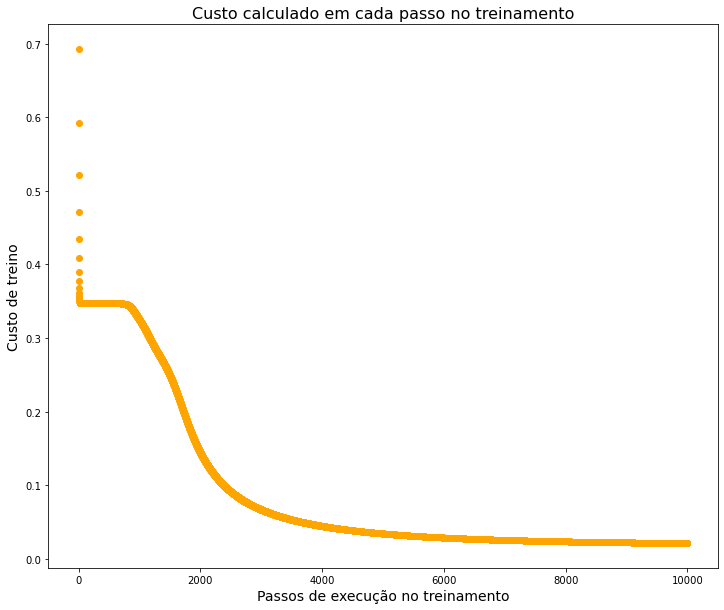

In [5]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter( [i for i in range(total_costs.loc['label_3'].shape[0])], total_costs.loc['label_8'] , color='orange') 
ax.set_xlabel("Passos de execução no treinamento", fontsize=14)
ax.set_ylabel("Custo de treino", fontsize=14)
ax.set_title("Custo calculado em cada passo no treinamento", fontsize=16)


## CALCULATE VALUES FOR DATA TEST

In [6]:
class_matrix = classification_matrix(df_labels, cfg.LABELS)

activations  = activation_layer(df_images, class_matrix, thetas=[thetas_12, thetas_23])

cost         = cost_function_sigmoid(activations, class_matrix, thetas=[thetas_12, thetas_23], lambda_value=cfg.LAMBDA_VALUE[0])

In [7]:
classification_labels = pd.DataFrame( activations[-1].idxmax(axis="index") , columns=['value'])

## CORRECT CLASSIFICATION

In [8]:
for i in range( classification_labels.shape[0] ):
    classification_labels.iloc[i] = int( classification_labels.iloc[i][0].split("label_")[1] )
correct_classification = 1*(classification_labels == df_labels)

correct_classification = pd.concat([correct_classification, df_labels, classification_labels], axis=1)
correct_classification.columns = ['correto', 'original', 'atribuido']

correct_classification

,correto,original,atribuido
image_5,1,10,10
image_15,1,10,10
image_16,1,10,10
image_19,1,10,10
image_23,1,10,10
...,...,...,...
image_4982,1,9,9
image_4989,1,9,9
image_4990,1,9,9
image_4993,1,9,9


In [9]:
ratio = 100 * correct_classification['correto'].value_counts(normalize=True)
print(ratio)
print(f"\nCORRECTS = {round(ratio[1],2)}%")

1    87.7
0    12.3
Name: correto, dtype: float64

CORRECTS = 87.7%


In [10]:
cost

,cost
label_1,0.037719
label_2,0.070606
label_3,0.055519
label_4,0.089299
label_5,0.105496
label_6,0.079984
label_7,0.100797
label_8,0.102237
label_9,0.092473
label_10,0.027254


## CONVERT TO CSV

In [11]:
ratio.to_csv(f"../data/corrects/ratio.csv")
cost.to_csv(f"../data/corrects/cost.csv")
correct_classification.to_csv(f"../data/corrects/corrects.csv")